In [1]:
from IPython.display import Image
%matplotlib inline

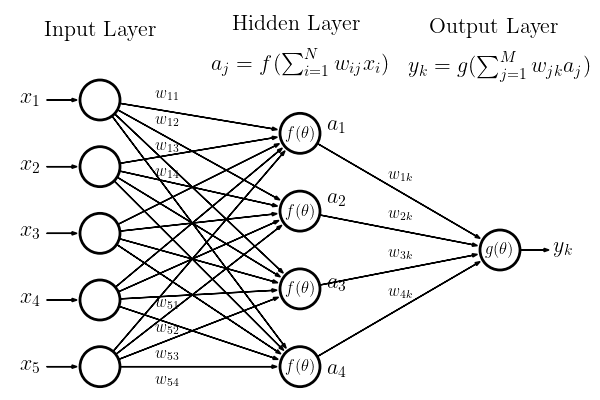

In [5]:
Image(filename='fig1.png',width=600)


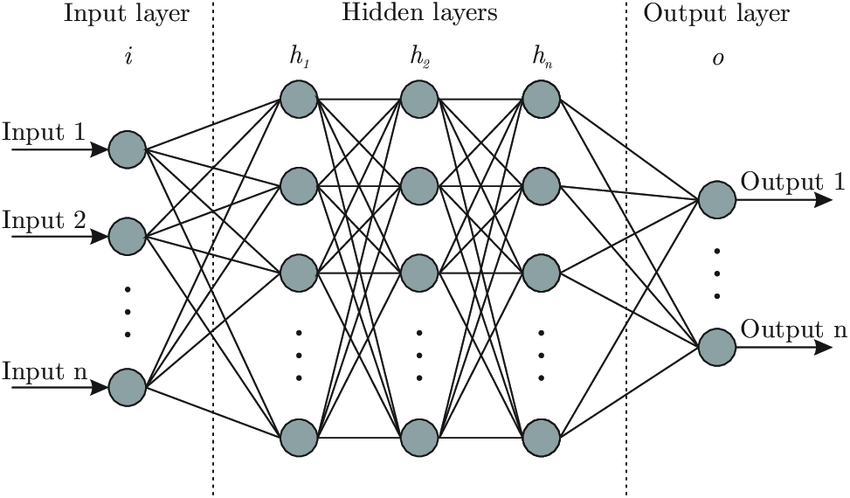

In [7]:
Image(filename='fig2.png',width=600)


In [8]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward pass
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_layer_input)

        return self.predicted_output

    def backward(self, X, y, learning_rate=0.01):
        # Backward pass
        error = y - self.predicted_output

        output_delta = error * self.sigmoid_derivative(self.predicted_output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=10000):
        for epoch in range(epochs):
            # Forward pass
            predicted_output = self.forward(X)

            # Backward pass and optimization
            self.backward(X, y)

            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - predicted_output))
                print(f"Epoch {epoch}, Loss: {loss}")

# Example usage
if __name__ == "__main__":
    # Sample data (XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Create and train the MLP
    mlp = MLP(input_size=2, hidden_size=4, output_size=1)
    mlp.train(X, y)

Epoch 0, Loss: 0.3418311140777788
Epoch 1000, Loss: 0.25174971277205277
Epoch 2000, Loss: 0.24546614194583946
Epoch 3000, Loss: 0.2406541934418981
Epoch 4000, Loss: 0.23611134443736034
Epoch 5000, Loss: 0.23116210392165173
Epoch 6000, Loss: 0.2254136194760617
Epoch 7000, Loss: 0.21862513084584054
Epoch 8000, Loss: 0.21064119326617603
Epoch 9000, Loss: 0.20135794723137568
